In [1]:
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings("ignore")

import torch
import numpy as np
import pandas as pd
import dill as pickle
from copy import deepcopy
from matplotlib import pyplot as plt
from matplotlib.colors import TABLEAU_COLORS
from sklearn.model_selection import KFold

from uncertain.utils.data import Data
from uncertain.utils.training import train
from uncertain.utils.evaluation import test_recommendations, uncertainty_distributions

from uncertain.explicit import MF, CPMF, OrdRec, BeMF, GMF, GaussianGMF, MLP, GaussianMLP
from uncertain.extras import Ensemble, Resample, UncertainWrapper, UserHeuristic, ItemHeuristic

data = pd.read_csv('data/data.csv')
data.columns = ['user', 'item', 'score', 'timestamps']
ML = Data(data, implicit=False)

MovieLens data prepared: 6040 users, 3706 items.
951889 Train interactions, 24160 validation and test interactions.


# ExplicitMF (FunkSVD)

In [4]:
best_loss = 0
for wd in [1, 0.5, 0.1]:
    model = MF(ML.n_user, ML.n_item, embedding_dim=10, lr=0.0001, weight_decay=wd)
    this_loss = train(model, ML)
    print(test_recommendations(model, ML, max_k=10))
    if this_loss > best_loss:
        best_loss = this_loss
        with open('fitted/baseline.pth', 'wb') as f:
            pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.01804635761589404, RMSE = 0.9092262366860042


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


{'RMSE': 0.9265631791213603, 'Precision': array([0.01887417, 0.01837748, 0.01766004, 0.01701159, 0.01602649,
       0.01509382, 0.01461684, 0.01394868, 0.0134106 , 0.01336093]), 'Recall': array([0.00471854, 0.00918874, 0.01324503, 0.01701159, 0.02003311,
       0.02264073, 0.02557947, 0.02789735, 0.03017384, 0.03340232]), 'NDCG': array([0.01887417, 0.04464672, 0.07041855, 0.09429507, 0.11409197,
       0.13250425, 0.15068248, 0.16563895, 0.17929254, 0.1949172 ]), 'Diversity': array([0.26363889, 0.27352436, 0.28031837, 0.28532593, 0.28976617,
       0.29355289, 0.29708692, 0.29993066, 0.30282358]), 'Novelty': array([0.19870185, 0.20081877, 0.20090627, 0.20249636, 0.20314445,
       0.20385367, 0.20508206, 0.20684643, 0.20702774, 0.20756808])}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.016100993377483445, RMSE = 0.8995985555600862


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


{'RMSE': 0.9188262139188585, 'Precision': array([0.01903974, 0.01821192, 0.01699779, 0.01576987, 0.01539735,
       0.01462472, 0.01395459, 0.01326573, 0.01289551, 0.01251656]), 'Recall': array([0.00475993, 0.00910596, 0.01274834, 0.01576987, 0.01924669,
       0.02193709, 0.02442053, 0.02653146, 0.0290149 , 0.03129139]), 'NDCG': array([0.01903974, 0.04598691, 0.06958444, 0.09147087, 0.11225749,
       0.12886959, 0.14515372, 0.15758332, 0.17379143, 0.1871338 ]), 'Diversity': array([0.28244376, 0.28974394, 0.29565533, 0.30019476, 0.30436941,
       0.30784191, 0.31071875, 0.31329893, 0.31563978]), 'Novelty': array([0.19865566, 0.20220802, 0.20217218, 0.20271845, 0.20507391,
       0.20627907, 0.2072802 , 0.20834693, 0.20891508, 0.20959849])}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.014279801324503311, RMSE = 0.8992529890086984
{'RMSE': 0.9144174590736633, 'Precision': array([0.01672185, 0.01531457, 0.01374172, 0.01320364, 0.01254967,
       0.01203091, 0.01196783, 0.01171358, 0.01142384, 0.01129139]), 'Recall': array([0.00418046, 0.00765728, 0.01030629, 0.01320364, 0.01568709,
       0.01804636, 0.02094371, 0.02342715, 0.02570364, 0.02822848]), 'NDCG': array([0.01672185, 0.03857392, 0.05843959, 0.0764122 , 0.09274044,
       0.10730636, 0.12365845, 0.13775555, 0.15107349, 0.16430283]), 'Diversity': array([0.30897721, 0.31591891, 0.32159928, 0.32560817, 0.32882129,
       0.33197317, 0.3345474 , 0.33689443, 0.33905217]), 'Novelty': array([0.19604893, 0.20246124, 0.20444369, 0.2065588 , 0.20815715,
       0.20838562, 0.20973895, 0.2114336 , 0.21142008, 0.2131175 ])}


In [7]:
best_loss = 0
for wd in [0.2, 0.1, 0.05]:
    model = MF(ML.n_user, ML.n_item, embedding_dim=10, lr=0.0002, weight_decay=wd)
    this_loss = train(model, ML)
    print(test_recommendations(model, ML, max_k=10))
    if this_loss > best_loss:
        best_loss = this_loss
        with open('fitted/baseline.pth', 'wb') as f:
            pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.014279801324503311, RMSE = 0.9019973624769133


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


{'RMSE': 0.9187606148399657, 'Precision': array([0.01655629, 0.01589404, 0.01628035, 0.01510762, 0.01387417,
       0.01296909, 0.01265374, 0.01254139, 0.01228845, 0.01180464]), 'Recall': array([0.00413907, 0.00794702, 0.01221026, 0.01510762, 0.01734272,
       0.01945364, 0.02214404, 0.02508278, 0.02764901, 0.02951159]), 'NDCG': array([0.01655629, 0.04016083, 0.06535144, 0.0845244 , 0.10142951,
       0.11717149, 0.1335015 , 0.14877609, 0.16354727, 0.1755506 ]), 'Diversity': array([0.30098889, 0.30790256, 0.31334319, 0.31744228, 0.32119958,
       0.32389601, 0.32655501, 0.32891776, 0.3312754 ]), 'Novelty': array([0.20389542, 0.20288834, 0.20575092, 0.20626961, 0.2062402 ,
       0.20738728, 0.20888841, 0.21122377, 0.21224002, 0.21269406])}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.014486754966887417, RMSE = 0.8990235757766559


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


{'RMSE': 0.9162826611961099, 'Precision': array([0.01688742, 0.01556291, 0.01462472, 0.01407285, 0.0136755 ,
       0.01335541, 0.01291391, 0.01235513, 0.01221486, 0.01173841]), 'Recall': array([0.00422185, 0.00778146, 0.01096854, 0.01407285, 0.01709437,
       0.02003311, 0.02259934, 0.02471026, 0.02748344, 0.02934603]), 'NDCG': array([0.01688742, 0.03942987, 0.06029063, 0.08144049, 0.10019849,
       0.11760798, 0.1331093 , 0.14742179, 0.16251906, 0.17384144]), 'Diversity': array([0.31466156, 0.32043488, 0.32489684, 0.32842375, 0.33128121,
       0.3336909 , 0.33628824, 0.33850971, 0.34047656]), 'Novelty': array([0.19476349, 0.20210392, 0.20680091, 0.20758282, 0.20813213,
       0.20891456, 0.2105489 , 0.21096286, 0.21251463, 0.21342967])}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.01390728476821192, RMSE = 0.900686033223489
{'RMSE': 0.9159497374689196, 'Precision': array([0.01738411, 0.01514901, 0.01374172, 0.01262417, 0.01261589,
       0.01208609, 0.01166036, 0.0111755 , 0.01076159, 0.01086093]), 'Recall': array([0.00434603, 0.0075745 , 0.01030629, 0.01262417, 0.01576987,
       0.01812914, 0.02040563, 0.02235099, 0.02421358, 0.02715232]), 'NDCG': array([0.01738411, 0.03863019, 0.05821935, 0.07499223, 0.09319542,
       0.10839542, 0.12323298, 0.13650049, 0.14742603, 0.1628061 ]), 'Diversity': array([0.31998032, 0.32661022, 0.33150286, 0.33571212, 0.33892495,
       0.34163443, 0.34391915, 0.3461221 , 0.34797377]), 'Novelty': array([0.20465036, 0.20277264, 0.20337644, 0.20446755, 0.2064048 ,
       0.20852441, 0.21088453, 0.2119458 , 0.21203229, 0.21325963])}


In [8]:
best_loss = 0
for wd in [0]:
    model = MF(ML.n_user, ML.n_item, embedding_dim=10, lr=0.0002, weight_decay=wd)
    this_loss = train(model, ML)
    print(test_recommendations(model, ML, max_k=10))
    if this_loss > best_loss:
        best_loss = this_loss
        with open('fitted/baseline.pth', 'wb') as f:
            pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.0125, RMSE = 0.9019881846291028
{'RMSE': 0.9181936250792779, 'Precision': array([0.01655629, 0.01440397, 0.01330022, 0.01245861, 0.01188742,
       0.01147903, 0.01118732, 0.01096854, 0.01039367, 0.0102649 ]), 'Recall': array([0.00413907, 0.00720199, 0.00997517, 0.01245861, 0.01485927,
       0.01721854, 0.01957781, 0.02193709, 0.02338576, 0.02566225]), 'NDCG': array([0.01655629, 0.0371807 , 0.0564918 , 0.07290775, 0.08872777,
       0.10380098, 0.11801204, 0.13108471, 0.14239076, 0.15480539]), 'Diversity': array([0.32958562, 0.33679733, 0.34212421, 0.34646874, 0.34969564,
       0.35232698, 0.35448602, 0.35637821, 0.35807779]), 'Novelty': array([0.20089083, 0.20420641, 0.20549244, 0.20551417, 0.20670281,
       0.20850928, 0.20868488, 0.20933056, 0.21023544, 0.21276809])}


# Ensemble

In [ ]:
models = [model]
for _ in range(2):
    models.append(MF(ML.n_user, ML.n_item, embedding_dim=32, lr=1e-3, weight_decay=5e-06))
    train(models[-1], ML)

model_ = Ensemble(models)
with open('fitted/ensemble.pkl', 'wb') as f:
    pickle.dump(model_, f, pickle.HIGHEST_PROTOCOL)

# Resample

In [ ]:
models = []
og = deepcopy(ML.train)
for _ in range(3):
    ML.train = og[np.random.choice(len(og), int(0.8*len(og)), replace=False), :]
    models.append(MF(ML.n_user, ML.n_item, embedding_dim=32, lr=1e-3, weight_decay=model.weight_decay))
    train(models[-1], ML)
model_ = Resample(model, models)
with open('fitted/resample.pkl', 'wb') as f:
    pickle.dump(model_, f, pickle.HIGHEST_PROTOCOL)
ML.train = og

# Zhu et. al

In [ ]:
errors = np.empty(len(ML.train))
og = deepcopy(ML)
for train_idx, test_idx in KFold(n_splits=2, shuffle=True).split(ML.train):
    test = og.train[test_idx]
    ML.train = og.train[train_idx]
    model_ = MF(ML.n_user, ML.n_item, embedding_dim=32, lr=1e-3, weight_decay=model.weight_decay)
    train(model_, ML)
    errors[test_idx] = np.abs(model_.predict(torch.tensor(test[:, 0]).long(), torch.tensor(test[:, 1]).long()) - test[:, 2])
ML.train = deepcopy(og.train)
ML.train[:, 2] = errors
ML.val[:, 2] = np.abs(model.predict(torch.tensor(ML.val[:, 0]).long(), torch.tensor(ML.val[:, 1]).long()) - ML.val[:, 2])
model_ = MF(ML.n_user, ML.n_item, embedding_dim=32, lr=1e-3, weight_decay=model.weight_decay)
train(model_, ML)
ML = og
with open('fitted/zhu.pth', 'wb') as f:
    pickle.dump(model_, f, pickle.HIGHEST_PROTOCOL)  

# CPMF

In [4]:
best_loss = 1000
grid = [0.01]
grid2 = [0.5]
pairs = [(wd0, wd1) for wd0 in grid for wd1 in grid2]
for wd0, wd1 in pairs:
    model = CPMF(ML.n_user, ML.n_item, embedding_dim=10, lr=0.0002, weight_decay_MF=wd0, weight_decay_gammas=wd1)
    this_loss = train(model, ML)
    if this_loss < best_loss:
        best_loss = this_loss
        with open('fitted/cpmf.pth', 'wb') as f:
            pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
2 | user_gammas     | Embedding | 6.0 K 
3 | item_gammas     | Embedding | 3.7 K 
4 | var_activation  | Softplus  | 0     
----------------------------------------------
107 K     Trainable params
0         Non-trainable params
107 K     Total params
0.429     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
2 | user_gammas     | Embedding | 6.0 K 
3 | item_gammas     | Embedding | 3.7 K 
4 | var_activation  | Softplus  | 0     
----------------------------------------------
107 K     Trainable params
0         Non-trainable params
107 K     Total params
0.429     Total estimated model params size (MB)


Model's validation metrics: Precision = 0.01663907284768212, RMSE = 0.9101535006138282


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
2 | user_gammas     | Embedding | 6.0 K 
3 | item_gammas     | Embedding | 3.7 K 
4 | var_activation  | Softplus  | 0     
----------------------------------------------
107 K     Trainable params
0         Non-trainable params
107 K     Total params
0.429     Total estimated model params size (MB)


Model's validation metrics: Precision = 0.01626655629139073, RMSE = 0.9416478527388606


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.014817880794701987, RMSE = 0.8949051782501813


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
2 | user_gammas     | Embedding | 6.0 K 
3 | item_gammas     | Embedding | 3.7 K 
4 | var_activation  | Softplus  | 0     
----------------------------------------------
107 K     Trainable params
0         Non-trainable params
107 K     Total params
0.429     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model's validation metrics: Precision = 0.014776490066225166, RMSE = 0.9335116200701871


# OrdRec

In [ ]:
ML.to_ordinal()
best_loss = 1000
grid = [0.01]
grid2 = [0.5]
pairs = [(wd0, wd1) for wd0 in grid for wd1 in grid]
for wd0, wd1 in pairs:
    model = OrdRec(ML.n_user, ML.n_item, ML.score_labels, embedding_dim=32, lr=5e-3, weight_decay_MF=wd0, weight_decay_step=wd1)
    this_loss = train(model, ML)
    if this_loss < best_loss:
        best_loss = this_loss
        with open('fitted/ordrec.pth', 'wb') as f:
            pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 193 K 
1 | item_embeddings | Embedding | 118 K 
2 | user_step       | Embedding | 24.2 K
3 | item_step       | Embedding | 14.8 K
----------------------------------------------
350 K     Trainable params
0         Non-trainable params
350 K     Total params
1.403     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

# BeMF

In [3]:
ML.to_ordinal()
best_loss = 1000
grid = [0]
for wd in grid:
    model = BeMF(ML.n_user, ML.n_item, ML.score_labels, embedding_dim=2, lr=0.001, weight_decay=wd)
    this_loss = train(model, ML)
    if this_loss < best_loss:
        best_loss = this_loss
        with open('fitted/ordrec.pth', 'wb') as f:
            pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.4 K
1 | item_embeddings | Embedding | 37.1 K
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
97.5 K    Trainable params
0         Non-trainable params
97.5 K    Total params
0.390     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [5]:
model.recommend(0)

,scores,uncertainties
4,3.354346,2.062738
0,3.348732,2.091263
17,3.329746,2.027366
50,3.321426,2.028348
182,3.319320,1.993661
122,3.317599,2.023236
393,3.317587,2.012911
368,3.314242,1.980498
163,3.311342,1.973093
13,3.308356,1.985754


In [6]:
test_recommendations(model, ML, max_k=10)

{'RMSE': 1.1796809832783215,
 'RPI': 0.4637915225169473,
 'Classification': 0.6674879238381788,
 'Quantile RMSE': array([0.8313039 , 0.92286764, 0.92255939, 0.99467411, 1.02563267,
        1.0335641 , 1.07674807, 1.11470864, 1.15053907, 1.15951546,
        1.18226879, 1.23290455, 1.22393926, 1.24998548, 1.31312454,
        1.30402597, 1.34333924, 1.39076877, 1.41789052, 1.45188977]),
 'Precision': array([0.00678808, 0.00529801, 0.00518764, 0.00496689, 0.00536424,
        0.00538079, 0.00532167, 0.00519454, 0.00494849, 0.00493377]),
 'Recall': array([0.00169702, 0.00264901, 0.00389073, 0.00496689, 0.0067053 ,
        0.00807119, 0.00931291, 0.01038907, 0.01113411, 0.01233444]),
 'NDCG': array([0.00678808, 0.0145668 , 0.02334814, 0.03040857, 0.03947685,
        0.04664217, 0.05326541, 0.05978325, 0.06508099, 0.07168606]),
 'Diversity': array([0.36642994, 0.36553565, 0.36572327, 0.36584599, 0.3658645 ,
        0.36564329, 0.36532752, 0.3653868 , 0.36532409]),
 'Novelty': array([0.2135123 

# Results

In [3]:
results = {}

# Baseline
with open('fitted/baseline.pth', 'rb') as f:
    model = pickle.load(f)
results['MF'] = test_recommendations(model, ML, max_k=10)

# Heuristics
user_support = np.bincount(ML.train_val.user)
item = ML.train_val.groupby('item').agg({'user': 'size', 'score': 'var'})
empty = np.where(~pd.Series(np.arange(ML.n_item)).isin(item.index))[0]
empty = pd.DataFrame(np.full((len(empty), 2), float('NaN')), index=empty, columns=['user', 'score'])
item = item.append(empty).sort_index().fillna(0).to_numpy()
results['User support'] = test_recommendations(UserHeuristic(base_MF=model, uncertainty=-user_support), ML, max_k=10)
results['Item support'] = test_recommendations(ItemHeuristic(base_MF=model, uncertainty=-item[:, 0]), ML, max_k=10)
results['Item variance'] = test_recommendations(ItemHeuristic(base_MF=model, uncertainty=item[:, 1]), ML, max_k=10)

# Ensemble
with open('fitted/ensemble.pkl', 'rb') as f:
    model_ = pickle.load(f)
results['Ensemble'] = test_recommendations(model_, ML, max_k=10)

# Resample
with open('fitted/resample.pkl', 'rb') as f:
    model_ = pickle.load(f)
results['Resample'] = test_recommendations(model_, ML, max_k=10)

# Zhu
with open('fitted/zhu.pth', 'rb') as f:
    model_ = pickle.load(f)
results['MF-CV'] = test_recommendations(UncertainWrapper(model, model_), ML, max_k=10)

# CPMF
with open('fitted/cpmf.pth', 'rb') as f:
    model = pickle.load(f)
results['CPMF'] = test_recommendations(model, ML, max_k=10)

# GMF
with open('fitted/gmf.pth', 'rb') as f:
    model = pickle.load(f)
results['GMF'] = test_recommendations(model, ML, max_k=10)

# Gaussian GMF
with open('fitted/ggmf.pth', 'rb') as f:
    model = pickle.load(f)
results['GGMF'] = test_recommendations(model, ML, max_k=10)

# OrdRec
with open('fitted/ordrec.pth', 'rb') as f:
    model = pickle.load(f)
results['OrdRec'] = test_recommendations(model, ML, max_k=10)

# Save
results_df = pd.DataFrame.from_dict(results, orient='Index')
with open('results/results_df.pkl', 'wb') as f:
    pickle.dump(results_df, f, pickle.HIGHEST_PROTOCOL)

## Helper to add new model results

In [8]:
with open('results/results_df.pkl', 'rb') as f:
    results = pickle.load(f).to_dict(orient='index')

with open('fitted/gmf.pth', 'rb') as f:
    model = pickle.load(f)
results['GMF'] = test_recommendations(model, ML, max_k=10)

# Gaussian GMF
with open('fitted/ggmf.pth', 'rb') as f:
    model = pickle.load(f)
results['GGMF'] = test_recommendations(model, ML, max_k=10)

with open('fitted/mlp.pth', 'rb') as f:
    model = pickle.load(f)
results['MLP'] = test_recommendations(model, ML, max_k=10)

with open('fitted/gmlp.pth', 'rb') as f:
    model = pickle.load(f)
results['GMLP'] = test_recommendations(model, ML, max_k=10)

# OrdRec
with open('fitted/ordrec.pth', 'rb') as f:
    model = pickle.load(f)
results['OrdRec'] = test_recommendations(model, ML, max_k=10)

# Save
results_df = pd.DataFrame.from_dict(results, orient='Index')
with open('results/results_df.pkl', 'wb') as f:
    pickle.dump(results_df, f, pickle.HIGHEST_PROTOCOL)

In [9]:
with open('fitted/baseline.pth', 'rb') as f:
    model = pickle.load(f)
print(model.weight_decay)

with open('fitted/cpmf.pth', 'rb') as f:
    model = pickle.load(f)
print(model.weight_decay_MF, model.weight_decay_gammas)

with open('fitted/ordrec.pth', 'rb') as f:
    model = pickle.load(f)
print(model.weight_decay_MF, model.weight_decay_step)

5e-06
1e-06 1e-05
1e-06 5e-06


                   RMSE       RPI  Classification
MF             0.917599       NaN             NaN
User support   0.917599  0.160650        0.545558
Item support   0.917599  0.113172        0.531036
Item variance  0.917599  0.374423        0.578021
Ensemble       0.913560  0.206296        0.521746
Resample       0.917599  0.325276        0.544306
MF-CV          0.917599  0.708653        0.629956
CPMF           0.917292  0.632828        0.613201
OrdRec         0.914753  0.913403        0.686676
GGMF           0.918983  0.794896        0.641277
GMF            0.919134       NaN             NaN
MLP            0.933596       NaN             NaN
GMLP           0.930741  0.845403        0.630392


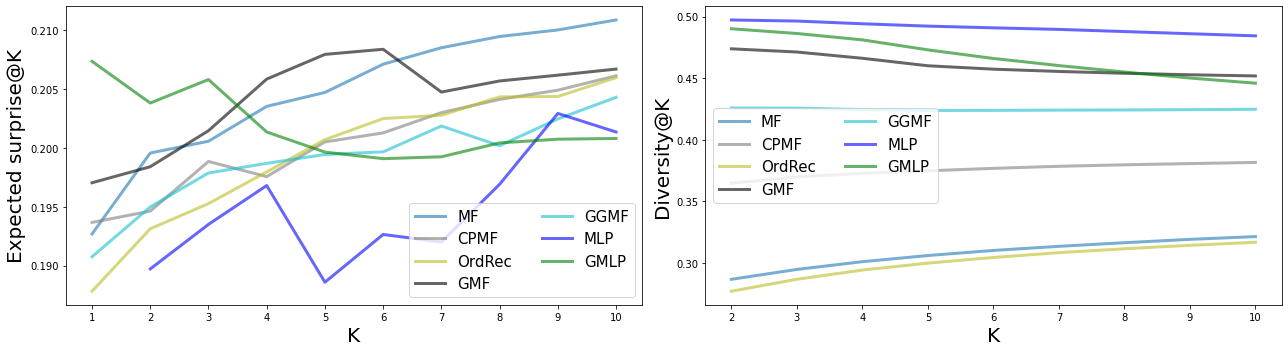

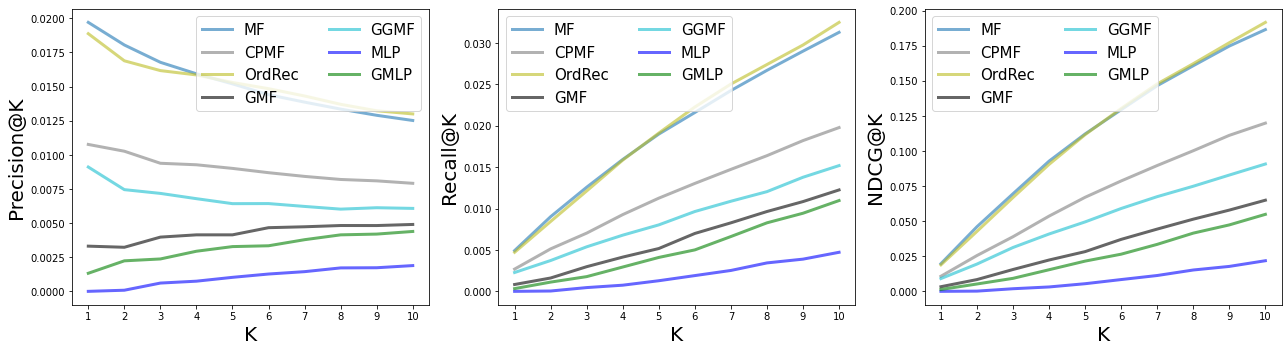

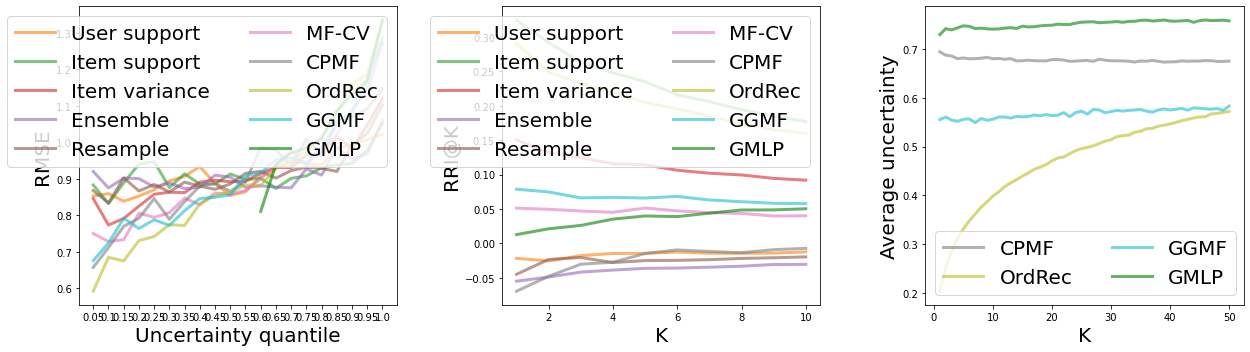

In [10]:
# Load
with open('results/results_df.pkl', 'rb') as f:
    results_df = pickle.load(f)
colors = [c for c in list(TABLEAU_COLORS)] + ['k', 'b', 'g']
keys = results_df.index.to_list()
colors = {keys[i]:colors[i] for i in range(len(keys))}

# Rating prediction evaluation
ratings = results_df[['RMSE', 'RPI', 'Classification']]
ratings.to_csv('results/rating_predictions.csv')
print(ratings)

# Diversity and novelty
keys = ['MF', 'CPMF', 'OrdRec', 'GMF', 'GGMF', 'MLP', 'GMLP']
f, ax = plt.subplots(ncols=2, figsize=(18, 5))
for key in keys:
    ax[0].plot(np.arange(1, 11), results_df['Novelty'][key],
               '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[1].plot(np.arange(2, 11), results_df['Diversity'][key],
               '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
ax[0].set_xticks(np.arange(1, 11))
ax[0].set_xlabel('K', fontsize=20)
ax[0].set_ylabel('Expected surprise@K', fontsize=20)
ax[0].legend(ncol=2, fontsize=15)
ax[1].set_xticks(np.arange(2, 11))
ax[1].set_xlabel('K', fontsize=20)
ax[1].set_ylabel('Diversity@K', fontsize=20)
ax[1].legend(ncol=2, fontsize=15)
f.tight_layout()
f.savefig('results/')

# Top-K accuracy metrics
f, ax = plt.subplots(ncols=3, figsize=(18, 5), sharex=True)
for key in keys:
    ax[0].plot(np.arange(1, 11), results_df['Precision'][key],
               '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[1].plot(np.arange(1, 11), results_df['Recall'][key],
               '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[2].plot(np.arange(1, 11), results_df['NDCG'][key],
               '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
ax[0].set_xticks(np.arange(1, 11))
ax[0].set_xlabel('K', fontsize=20)
ax[0].set_ylabel('Precision@K', fontsize=20)
ax[0].legend(ncol=2, fontsize=15)
ax[1].set_xlabel('K', fontsize=20)
ax[1].set_ylabel('Recall@K', fontsize=20)
ax[1].legend(ncol=2, fontsize=15)
ax[2].set_xlabel('K', fontsize=20)
ax[2].set_ylabel('NDCG@K', fontsize=20)
ax[2].legend(ncol=2, fontsize=15)
f.tight_layout()

# Uncertainty
f, ax = plt.subplots(ncols=3, figsize=(18, 5))
keys = [k for k in results_df.index.to_list() if k not in ['MF', 'GMF', 'MLP']]
for key in keys:
    ax[0].plot(np.arange(1, 21), results_df['Quantile RMSE'][key],
               '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[1].plot(np.arange(1, 11), results_df['RRI'][key],
               '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
    if key in ['CPMF', 'OrdRec', 'GGMF', 'GMLP']:
        ax[2].plot(np.arange(1, 51), results_df['Uncertainty'][key],
                   '-', color=colors[key], label=key, linewidth=3, alpha=0.6)
ax[0].set_xticks(np.arange(1, 21))
ax[0].set_xticklabels([round(elem, 2) for elem in np.linspace(start=0.05, stop=1, num=20).tolist()])
ax[0].set_xlabel('Uncertainty quantile', fontsize=20)
ax[0].set_ylabel('RMSE', fontsize=20)
ax[0].legend(ncol=2, fontsize=20)
ax[1].set_xlabel('K', fontsize=20)
ax[1].set_ylabel('RRI@K', fontsize=20)
ax[1].legend(ncol=2, fontsize=20)
ax[2].set_xlabel('K', fontsize=20)
ax[2].set_ylabel('Average uncertainty', fontsize=20)
ax[2].legend(ncol=2, fontsize=20)
f.tight_layout()

In [5]:
results['GMF']

{'RMSE': 1.1563587511478495,
 'Precision': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.83958793e-05, 1.65562914e-05]),
 'Recall': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13907285e-05, 4.13907285e-05]),
 'NDCG': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00016556, 0.00017242]),
 'Diversity': array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.49998864, 0.49711659]),
 'Novelty': array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan, 0.47094997, 0.47094997])}

In [10]:
with open('fitted/ggmf.pth', 'rb') as f:
    model = pickle.load(f)
model.predict_user(torch.tensor(0)), model.recommend(0)

((array([4.4612885, 3.4959219, 3.843131 , ..., 1.2604407, 2.4151387,
         0.0054183], dtype=float32),
  array([0.3787311 , 1.3323891 , 0.7029276 , ..., 0.16002505, 0.40879562,
         0.6772442 ], dtype=float32)),
        scores  uncertainties
 176  4.670438       0.497852
 984  4.656814       0.581327
 121  4.618691       0.471860
 21   4.604987       0.484494
 68   4.600554       0.478741
 15   4.533218       0.449744
 227  4.531243       0.493905
 62   4.479535       0.498126
 393  4.478468       0.483292
 406  4.475624       0.475556)

In [10]:
with open('fitted/ordrec.pth', 'rb') as f:
    model = pickle.load(f)
# results['MF'] = test_recommendations(model, ML, max_k=10)
# test_recommendations(UserHeuristic(base_MF=model, uncertainty=-user_support), ML, max_k=10)

In [17]:
model.recommend(0)

,scores,uncertainties
176,4.893681,0.137415
121,4.890144,0.134446
13,4.857247,0.167566
15,4.847904,0.167991
125,4.804395,0.244899
162,4.795189,0.229656
4,4.763007,0.276477
175,4.760701,0.303317
0,4.759523,0.258676
1922,4.748947,0.346769


$P(score = 5)$ | $1 - P(score = 5)$